In [2]:
import pandas as pd 
import io 

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/train_age_dataset.csv")
data.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [5]:
data.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


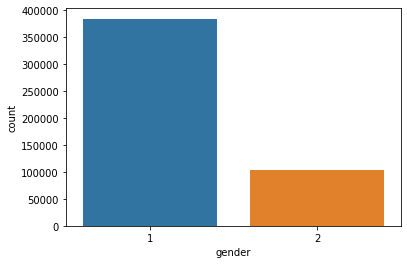

In [8]:
sns.countplot('gender',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


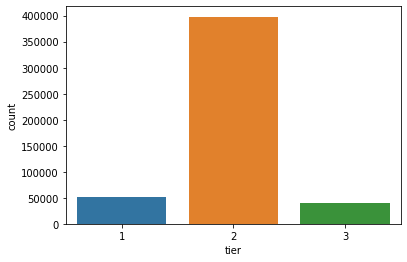

In [9]:
sns.countplot('tier',data=data)

In [10]:
data=data.sample(frac=1).reset_index(drop=True)

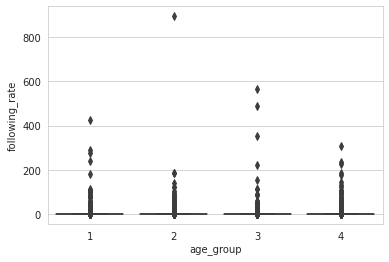

In [11]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'age_group', y = 'following_rate', data = data) 

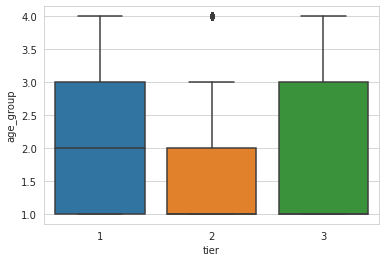

In [12]:
sns.boxplot(x = 'tier', y = 'age_group', data = data) 

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [14]:
enc_df = pd.DataFrame(enc.fit_transform(data[['tier']]).toarray())
data = data.join(enc_df)
data = data.rename(columns={0: 'tier_1', 1: 'tier_2',2:'tier_3' })
data.drop(['userId','tier','Unnamed: 0'],axis=1,inplace=True)
data.head(2)

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,tier_1,tier_2,tier_3
0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.117647,0.066148,6.950000,152.288583,0,0.007937,0.119048,0.0,0.000,0.031746,0.0,0.0,0.0,0.15873,0.0,3,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.025961,1.666667,96.425333,0,0.000000,0.024000,0.0,0.012,0.000000,0.0,0.0,0.0,0.02400,0.0,1,0.0,1.0,0.0


In [15]:
enc_df1 = pd.DataFrame(enc.fit_transform(data[['gender']]).toarray())
data = data.join(enc_df1)
data = data.rename(columns={0: 'gender_male', 1: 'gender_female' })
data.drop(['gender'],axis=1,inplace=True)

In [16]:
X=data.drop(['age_group'],axis=1)
y=data['age_group']

In [17]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [18]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.0625,random_state=42)

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/test_age_dataset.csv")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(test_data[['tier']]).toarray())
test_data = test_data.join(enc_df)
test_data = test_data.rename(columns={0: 'tier_1', 1: 'tier_2',2:'tier_3' })
test_data.drop(['userId','tier','Unnamed: 0'],axis=1,inplace=True)
enc_df1 = pd.DataFrame(enc.fit_transform(test_data[['gender']]).toarray())
test_data = test_data.join(enc_df1)
test_data = test_data.rename(columns={0: 'gender_male', 1: 'gender_female' })
test_data.drop(['gender'],axis=1,inplace=True)

In [ ]:
test_data.head(2)

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,tier_1,tier_2,tier_3,gender_male,gender_female
0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.033242,4.5,120.313571,0,0.0,0.062992,0.0,0.0,0.012598,0.0,0.0,0.062992,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.0,0.051057,9.5,188.615500,0,0.0,0.003636,0.0,0.0,0.000727,0.0,0.0,0.003636,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
predict = model.predict(test_data)

In [ ]:
df = pd.DataFrame({"prediction" : predict}, columns = ["prediction"]).set_index("prediction")

In [ ]:
df.head()

In [ ]:
def download_preds(df, file_name = 'outliers_4_test_predicted.csv'):
  df.to_csv(file_name)
  from google.colab import files
  files.download(file_name)
download_preds(df, file_name = 'outliers_4_test_predicted.csv')

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.3MB 44kB/s 


In [19]:
from catboost import CatBoostClassifier
import timeit

In [20]:
model = CatBoostClassifier(iterations=950, learning_rate=0.005,task_type='GPU',max_depth=15, loss_function='MultiClass', border_count=64)

In [21]:
model.fit(train_x, train_y, eval_set=(test_x, test_y))

936:	learn: 0.5612065	test: 0.5928054	best: 0.5928054 (936)	total: 9m 33s	remaining: 7.96s
937:	learn: 0.5611356	test: 0.5927737	best: 0.5927737 (937)	total: 9m 34s	remaining: 7.34s
938:	learn: 0.5610689	test: 0.5927437	best: 0.5927437 (938)	total: 9m 34s	remaining: 6.73s
939:	learn: 0.5610052	test: 0.5926990	best: 0.5926990 (939)	total: 9m 35s	remaining: 6.12s
940:	learn: 0.5609405	test: 0.5926507	best: 0.5926507 (940)	total: 9m 35s	remaining: 5.51s
941:	learn: 0.5608814	test: 0.5926151	best: 0.5926151 (941)	total: 9m 36s	remaining: 4.89s
942:	learn: 0.5608091	test: 0.5925684	best: 0.5925684 (942)	total: 9m 37s	remaining: 4.28s
943:	learn: 0.5607366	test: 0.5925125	best: 0.5925125 (943)	total: 9m 37s	remaining: 3.67s
944:	learn: 0.5606546	test: 0.5924365	best: 0.5924365 (944)	total: 9m 38s	remaining: 3.06s
945:	learn: 0.5605811	test: 0.5924234	best: 0.5924234 (945)	total: 9m 38s	remaining: 2.45s
946:	learn: 0.5605218	test: 0.5923950	best: 0.5923950 (946)	total: 9m 39s	remaining: 1.83s

In [22]:
model.score(train_x,train_y)

0.7625599469368697

In [23]:
model.score(test_x,test_y)

0.7283586974308623